In [11]:
# Cell 1: Install packages
#!pip install pandas numpy scikit-learn matplotlib seaborn
#!pip install umap-learn hdbscan
#!pip install kagglehub
!pip install kagglehub[pandas-datasets]

In [12]:
# Cell 2: Import everything we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

import kagglehub  # Add this import

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import hdbscan
import umap

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ All libraries imported!")

✓ All libraries imported!


In [13]:
# Cell 3: Download GTZAN dataset using kagglehub
print("Downloading GTZAN dataset from Kaggle...")

# Download dataset
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print(f"✓ Dataset downloaded to: {path}")

# The dataset structure is:
# path/
#   Data/
#     features_3_sec.csv
#     features_30_sec.csv
#     genres_original/
#     images_original/

# Construct path to the features CSV
gtzan_features_path = os.path.join(path, 'Data', 'features_3_sec.csv')

# Check if file exists
if os.path.exists(gtzan_features_path):
    print(f"✓ Found features file: {gtzan_features_path}")
else:
    # Try alternative paths
    print("⚠ File not found at expected location. Searching...")
    
    # Search for the CSV file
    for root, dirs, files in os.walk(path):
        for file in files:
            if 'features_3_sec.csv' in file:
                gtzan_features_path = os.path.join(root, file)
                print(f"✓ Found file at: {gtzan_features_path}")
                break

# Load the data
print("\nLoading GTZAN dataset...")
gtzan_df = pd.read_csv(gtzan_features_path)

print(f"✓ Loaded {len(gtzan_df)} samples")
print(f"✓ Shape: {gtzan_df.shape}")

# Show what we have
print("\nDataset preview:")
print(gtzan_df.head())

print("\nGenre distribution:")
print(gtzan_df['label'].value_counts())

print("\nColumn names:")
print(gtzan_df.columns.tolist())

✓ Dataset downloaded to: C:\Users\muzam\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1
✓ Found features file: C:\Users\muzam\.cache\kagglehub\datasets\andradaolteanu\gtzan-dataset-music-genre-classification\versions\1\Data\features_3_sec.csv

Loading GTZAN dataset...
✓ Loaded 9990 samples
✓ Shape: (9990, 60)

Dataset preview:
            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777    

In [14]:
# Cell 4: Prepare feature matrix
# IMPORTANT: We ignore the genre labels - this is UNSUPERVISED clustering
# Drop filename and label columns - we only want the features
X = gtzan_df.drop(['filename', 'label'], axis=1)

print(f"Feature matrix shape: {X.shape}")
print(f"Number of songs: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Keep the labels for analysis later (but don't use them for training)
true_genres = gtzan_df['label'].values

print("\n✓ Features prepared (labels removed for unsupervised learning)")

Feature matrix shape: (9990, 58)
Number of songs: 9990
Number of features: 58

✓ Features prepared (labels removed for unsupervised learning)


In [15]:
# Cell 5: Normalize/standardize features
print("Normalizing features...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✓ Features normalized")
print(f"Mean: {X_scaled.mean():.6f}")
print(f"Std: {X_scaled.std():.6f}")

# Check for NaN values
if np.isnan(X_scaled).any():
    print("⚠ Warning: NaN values detected!")
else:
    print("✓ No NaN values")

Normalizing features...
✓ Features normalized
Mean: -0.000000
Std: 0.991342
✓ No NaN values


Finding optimal number of clusters...

Testing k=2... 

c:\Users\muzam\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\muzam\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\muzam\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\muzam\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

Silhouette: 0.1491
Testing k=3... Silhouette: 0.1387
Testing k=4... Silhouette: 0.1344
Testing k=5... Silhouette: 0.1398
Testing k=6... Silhouette: 0.1435
Testing k=7... Silhouette: 0.0981
Testing k=8... Silhouette: 0.0850
Testing k=9... Silhouette: 0.0870
Testing k=10... Silhouette: 0.0806
Testing k=11... Silhouette: 0.0745
Testing k=12... Silhouette: 0.0726
Testing k=13... Silhouette: 0.0624
Testing k=14... Silhouette: 0.0657
Testing k=15... Silhouette: 0.0589
Testing k=16... Silhouette: 0.0619
Testing k=17... Silhouette: 0.0563
Testing k=18... Silhouette: 0.0519
Testing k=19... Silhouette: 0.0564
Testing k=20... Silhouette: 0.0552


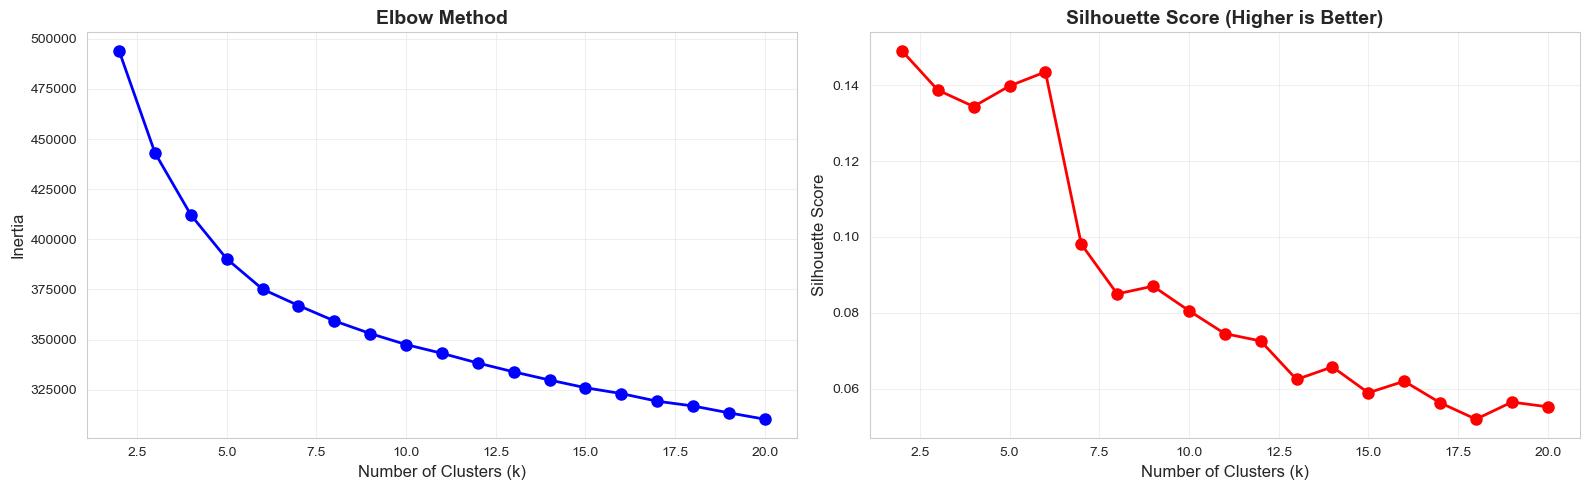


OPTIMAL K = 2
Best Silhouette Score = 0.1491


In [16]:
# Cell 6: Determine optimal K using Elbow Method
print("Finding optimal number of clusters...\n")

inertias = []
silhouette_scores = []
K_range = range(2, 21)

for k in K_range:
    print(f"Testing k={k}...", end=' ')
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    print(f"Silhouette: {silhouette_scores[-1]:.4f}")

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Elbow curve
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia', fontsize=12)
ax1.set_title('Elbow Method', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Silhouette scores
ax2.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score (Higher is Better)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimal_k_analysis.png', dpi=300)
plt.show()

# Find best K
best_k = K_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"\n{'='*50}")
print(f"OPTIMAL K = {best_k}")
print(f"Best Silhouette Score = {best_score:.4f}")
print(f"{'='*50}")

In [18]:
# Cell 7: Train the final K-Means model
# Use the optimal K from previous step (or choose your own)
FINAL_K = best_k  # You can change this manually if you want

print(f"Training K-Means model with k={FINAL_K}...")

# Train K-Means
kmeans_model = KMeans(n_clusters=FINAL_K, random_state=42, n_init=10)
cluster_labels = kmeans_model.fit_predict(X_scaled)

print("✓ Model trained!")

# Evaluate clustering quality
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
davies_bouldin = davies_bouldin_score(X_scaled, cluster_labels)

print(f"\n{'='*50}")
print(f"CLUSTERING METRICS")
print(f"{'='*50}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin:.4f} (lower is better)")

# Cluster distribution
print(f"\n{'='*50}")
print(f"CLUSTER DISTRIBUTION")
print(f"{'='*50}")
for i in range(FINAL_K):
    count = (cluster_labels == i).sum()
    print(f"Cluster {i}: {count} songs ({count/len(cluster_labels)*100:.1f}%)")

Training K-Means model with k=2...
✓ Model trained!

CLUSTERING METRICS
Silhouette Score: 0.1491
Davies-Bouldin Score: 2.3903 (lower is better)

CLUSTER DISTRIBUTION
Cluster 0: 6133 songs (61.4%)
Cluster 1: 3857 songs (38.6%)


Creating UMAP visualization...


c:\Users\muzam\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✓ UMAP reduction complete


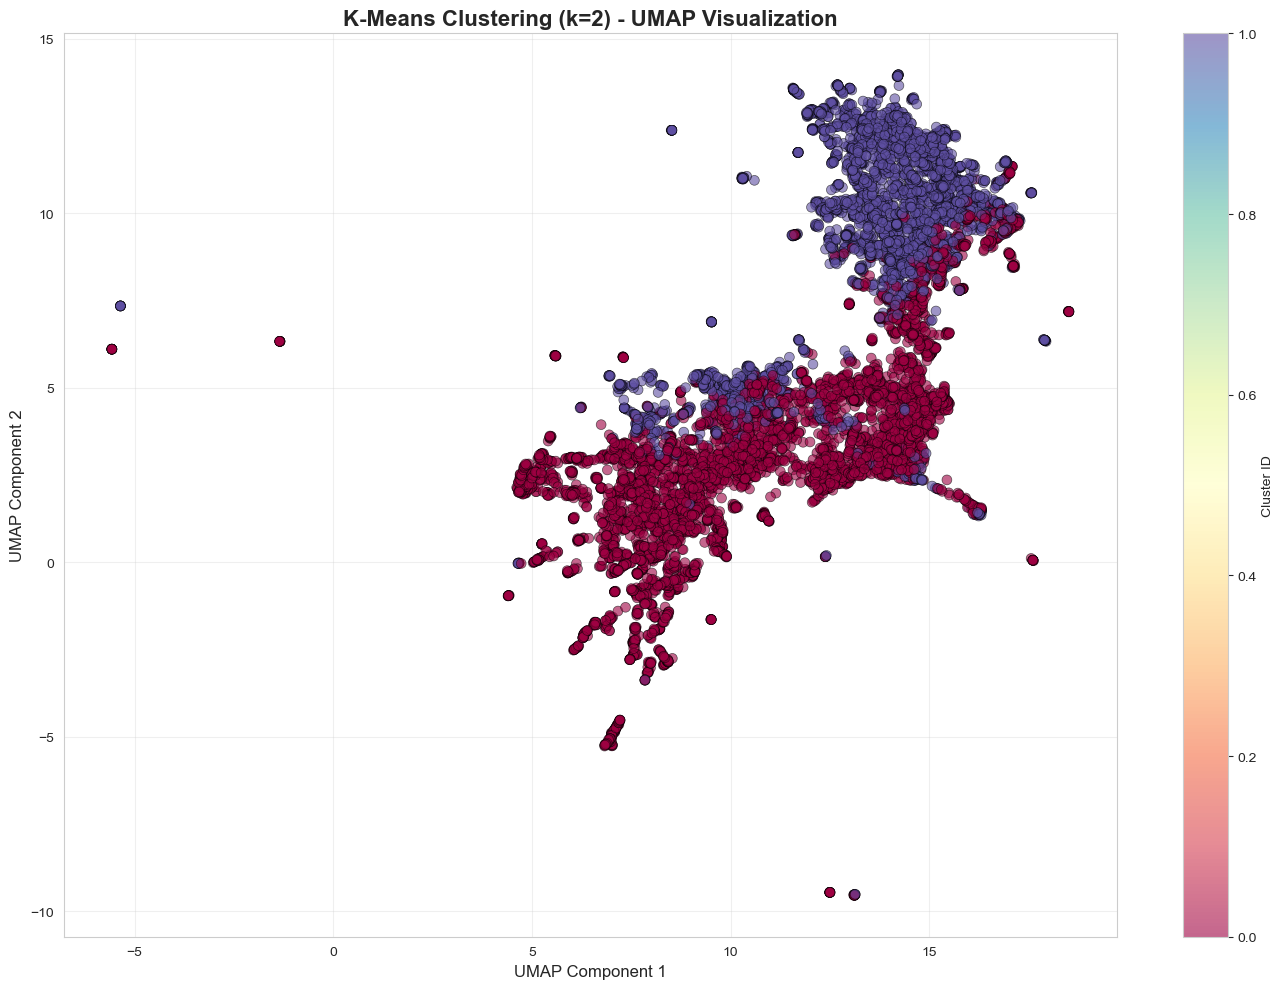

In [19]:
# Cell 8: Visualize the clusters in 2D
print("Creating UMAP visualization...")

# Reduce to 2D
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15)
embedding = reducer.fit_transform(X_scaled)

print("✓ UMAP reduction complete")

# Create plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    embedding[:, 0], 
    embedding[:, 1], 
    c=cluster_labels, 
    cmap='Spectral',
    s=50,
    alpha=0.6,
    edgecolors='black',
    linewidths=0.5
)

plt.colorbar(scatter, label='Cluster ID')
plt.title(f'K-Means Clustering (k={FINAL_K}) - UMAP Visualization', 
          fontsize=16, fontweight='bold')
plt.xlabel('UMAP Component 1', fontsize=12)
plt.ylabel('UMAP Component 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('clusters_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Cell 9: See what genres ended up in each cluster
print("\n" + "="*70)
print("CLUSTER ANALYSIS - What genres are in each cluster?")
print("="*70 + "\n")

# Create dataframe with clusters and original genres
analysis_df = pd.DataFrame({
    'cluster': cluster_labels,
    'genre': true_genres
})

# For each cluster, show genre distribution
for cluster_id in range(FINAL_K):
    cluster_data = analysis_df[analysis_df['cluster'] == cluster_id]
    
    print(f"\n--- Cluster {cluster_id} ({len(cluster_data)} songs) ---")
    genre_dist = cluster_data['genre'].value_counts()
    
    for genre, count in genre_dist.items():
        percentage = (count / len(cluster_data)) * 100
        print(f"  {genre}: {count} ({percentage:.1f}%)")
    
    # Show dominant genre
    dominant_genre = genre_dist.index[0]
    dominant_pct = (genre_dist.iloc[0] / len(cluster_data)) * 100
    print(f"  → Dominant: {dominant_genre} ({dominant_pct:.1f}%)")

print("\n" + "="*70)


CLUSTER ANALYSIS - What genres are in each cluster?


--- Cluster 0 (6133 songs) ---
  classical: 960 (15.7%)
  metal: 959 (15.6%)
  blues: 851 (13.9%)
  jazz: 816 (13.3%)
  rock: 738 (12.0%)
  country: 706 (11.5%)
  disco: 527 (8.6%)
  hiphop: 303 (4.9%)
  reggae: 223 (3.6%)
  pop: 50 (0.8%)
  → Dominant: classical (15.7%)

--- Cluster 1 (3857 songs) ---
  pop: 950 (24.6%)
  reggae: 777 (20.1%)
  hiphop: 695 (18.0%)
  disco: 472 (12.2%)
  country: 291 (7.5%)
  rock: 260 (6.7%)
  jazz: 184 (4.8%)
  blues: 149 (3.9%)
  metal: 41 (1.1%)
  classical: 38 (1.0%)
  → Dominant: pop (24.6%)



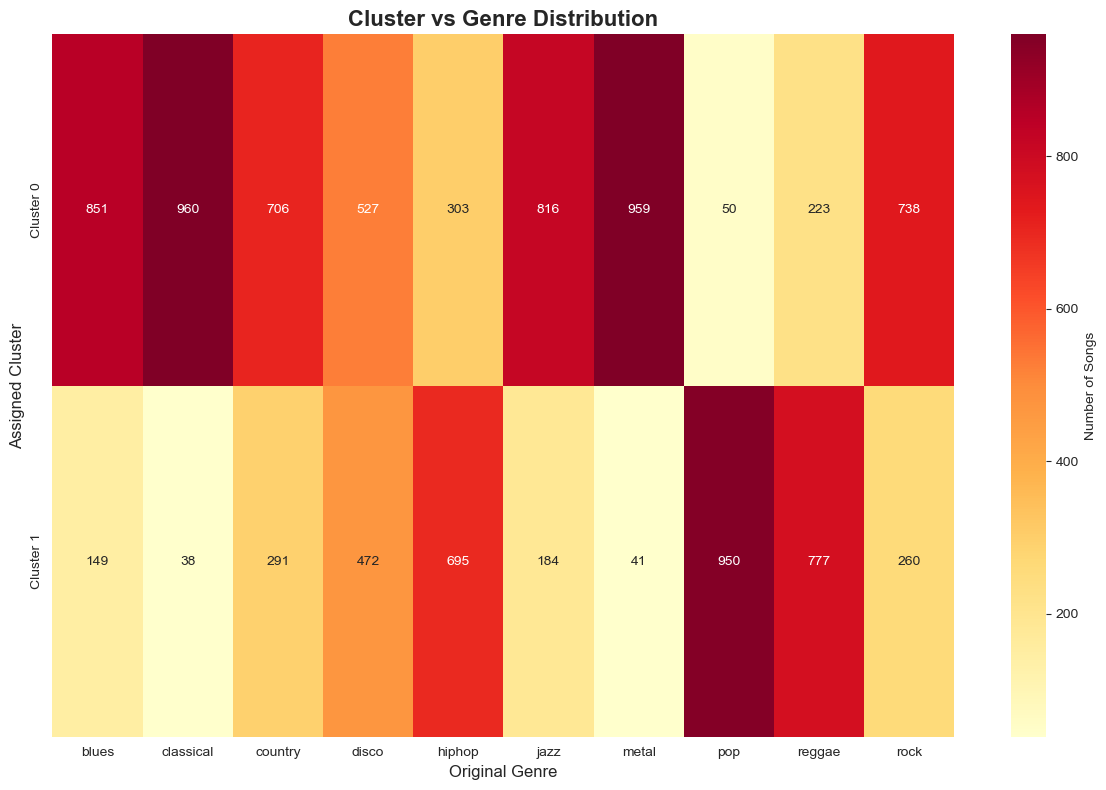

In [21]:
# Cell 10: Visualize cluster-genre relationships
# Create confusion matrix: clusters vs genres
from sklearn.metrics import confusion_matrix

# Get unique genres
genres = sorted(analysis_df['genre'].unique())
clusters = sorted(analysis_df['cluster'].unique())

# Create matrix
matrix = np.zeros((len(clusters), len(genres)))
for i, cluster_id in enumerate(clusters):
    for j, genre in enumerate(genres):
        count = ((analysis_df['cluster'] == cluster_id) & 
                 (analysis_df['genre'] == genre)).sum()
        matrix[i, j] = count

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, fmt='.0f', cmap='YlOrRd',
            xticklabels=genres, yticklabels=[f'Cluster {i}' for i in clusters],
            cbar_kws={'label': 'Number of Songs'})
plt.title('Cluster vs Genre Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Original Genre', fontsize=12)
plt.ylabel('Assigned Cluster', fontsize=12)
plt.tight_layout()
plt.savefig('cluster_genre_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


CLUSTER FEATURE ANALYSIS

Available feature columns:
['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var', 'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean']

Average feature values per cluster:

          tempo  spectral_centroid_mean  rms_mean  spectral_bandwidth_mean  \
cluster                                                                      
0        124.00                 1928.85      0.11                  1989.39   
1        126.29                 2629.14      0.16                  2642.09   

         zero_crossing_rate_mean  
cluster                           
0                           0.10  
1                           0.11  


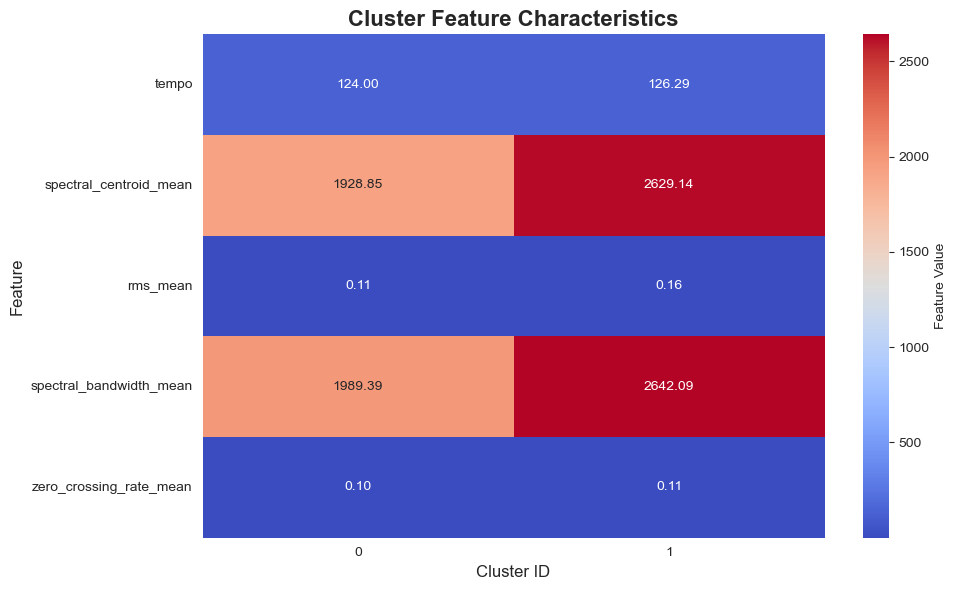

In [24]:
# Cell 11: What makes each cluster unique? (FIXED)
print("\n" + "="*70)
print("CLUSTER FEATURE ANALYSIS")
print("="*70 + "\n")

# Add cluster labels to original dataframe
gtzan_df['cluster'] = cluster_labels

# First, let's see what columns we actually have
print("Available feature columns:")
feature_cols = [col for col in gtzan_df.columns if col not in ['filename', 'label', 'cluster']]
print(feature_cols[:10])  # Show first 10

# Use columns that ACTUALLY exist in the dataset
key_features = ['tempo', 'spectral_centroid_mean', 'rms_mean', 
                'spectral_bandwidth_mean']

# If zcr columns exist with different name, use them
if 'zero_crossing_rate_mean' in gtzan_df.columns:
    key_features.append('zero_crossing_rate_mean')
elif 'zcr_mean' in gtzan_df.columns:
    key_features.append('zcr_mean')

# Calculate mean features per cluster
cluster_means = gtzan_df.groupby('cluster')[key_features].mean()

print("\nAverage feature values per cluster:\n")
print(cluster_means.round(2))

# Visualize as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means.T, annot=True, fmt='.2f', cmap='coolwarm',
            cbar_kws={'label': 'Feature Value'})
plt.title('Cluster Feature Characteristics', fontsize=16, fontweight='bold')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('cluster_features.png', dpi=300)
plt.show()

In [25]:
# Cell 12: Save the trained clustering model and scaler
print("Saving trained model and preprocessing objects...\n")

# Create a dictionary with everything we need
model_package = {
    'kmeans_model': kmeans_model,      # The trained K-Means model
    'scaler': scaler,                   # The StandardScaler (IMPORTANT!)
    'feature_columns': X.columns.tolist(),  # Names of features
    'n_clusters': FINAL_K,              # Number of clusters
    'silhouette_score': silhouette_avg  # Quality metric
}

# Save to file
with open('clustering_model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("✓ Model saved to 'clustering_model.pkl'")
print("\nSaved components:")
print("  - K-Means model (trained on GTZAN)")
print("  - StandardScaler (for normalizing features)")
print("  - Feature column names")
print("  - Number of clusters")
print("  - Performance metrics")

print("\n" + "="*70)
print("MODEL TRAINING COMPLETE!")
print("="*70)
print("\nYou can now use this model to cluster your own songs!")

Saving trained model and preprocessing objects...

✓ Model saved to 'clustering_model.pkl'

Saved components:
  - K-Means model (trained on GTZAN)
  - StandardScaler (for normalizing features)
  - Feature column names
  - Number of clusters
  - Performance metrics

MODEL TRAINING COMPLETE!

You can now use this model to cluster your own songs!


In [26]:
# Cell 13: Test that we can load the model back
print("Testing model loading...\n")

# Load the saved model
with open('clustering_model.pkl', 'rb') as f:
    loaded_package = pickle.load(f)

print("✓ Model loaded successfully!")
print(f"\nModel info:")
print(f"  Number of clusters: {loaded_package['n_clusters']}")
print(f"  Number of features: {len(loaded_package['feature_columns'])}")
print(f"  Training silhouette score: {loaded_package['silhouette_score']:.4f}")

# Test prediction on a sample
sample_song = X_scaled[0:1]  # Take first song
predicted_cluster = loaded_package['kmeans_model'].predict(sample_song)
print(f"\nTest prediction on sample song: Cluster {predicted_cluster[0]}")

print("\n✓ Model is ready to use on new songs!")

Testing model loading...

✓ Model loaded successfully!

Model info:
  Number of clusters: 2
  Number of features: 58
  Training silhouette score: 0.1491

Test prediction on sample song: Cluster 0

✓ Model is ready to use on new songs!


In [27]:
# Cell 14: Final summary
print("\n" + "="*70)
print("  TRAINING SUMMARY")
print("="*70)

print(f"\n📊 Dataset:")
print(f"   • Total songs: {len(gtzan_df)}")
print(f"   • Features per song: {X.shape[1]}")

print(f"\n🎯 Clustering Results:")
print(f"   • Algorithm: K-Means")
print(f"   • Number of clusters: {FINAL_K}")
print(f"   • Silhouette Score: {silhouette_avg:.4f}")
print(f"   • Davies-Bouldin Score: {davies_bouldin:.4f}")

print(f"\n💾 Saved Files:")
print(f"   • clustering_model.pkl - Trained model package")
print(f"   • optimal_k_analysis.png - K selection analysis")
print(f"   • clusters_visualization.png - UMAP visualization")
print(f"   • cluster_genre_heatmap.png - Cluster vs genre")
print(f"   • cluster_features.png - Feature characteristics")

print("\n" + "="*70)
print("  NEXT STEP: Use this model to cluster YOUR songs!")
print("="*70 + "\n")


  TRAINING SUMMARY

📊 Dataset:
   • Total songs: 9990
   • Features per song: 58

🎯 Clustering Results:
   • Algorithm: K-Means
   • Number of clusters: 2
   • Silhouette Score: 0.1491
   • Davies-Bouldin Score: 2.3903

💾 Saved Files:
   • clustering_model.pkl - Trained model package
   • optimal_k_analysis.png - K selection analysis
   • clusters_visualization.png - UMAP visualization
   • cluster_genre_heatmap.png - Cluster vs genre
   • cluster_features.png - Feature characteristics

  NEXT STEP: Use this model to cluster YOUR songs!

